<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/BestPractices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
%matplotlib inline


np.random.seed(0)


df = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
df.index = df.Name
df.filter(like='Rosa Hunt', axis = 0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,,
"Abbott, Mrs. Stanton (Rosa Hunt)",280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S


In [140]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [141]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)  # test data
y = df.Survived

In [142]:
X = pd.get_dummies(X)

In [143]:
X = X.fillna({'Age': X.Age.median()})

In [144]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [145]:
sklearn.set_config(print_changed_only=False)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.5,
                                                    random_state=42)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Name,,,,,,,,,,
"Hold, Mr. Stephen",2,44.0,1,0,26.0000,0,1,0,0,1
"Fortune, Miss. Mabel Helen",1,23.0,3,2,263.0000,1,0,0,0,1
"Bailey, Mr. Percy Andrew",2,18.0,0,0,11.5000,0,1,0,0,1
"Turpin, Mr. William John Robert",2,29.0,1,0,21.0000,0,1,0,0,1
"Nicola-Yarred, Master. Elias",3,12.0,1,0,11.2417,0,1,1,0,0


In [147]:
from sklearn.model_selection import GridSearchCV


clf = tree.DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30 + 1)}
grid_search_cv_clf = GridSearchCV(clf, params, cv=5)


grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=None,
                                              splitter='best'),
             n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [148]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [149]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [150]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [151]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [152]:
y_pred = best_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8004484304932735

# **CONFUSION MATRIX**

In [153]:
from sklearn.metrics import confusion_matrix

In [154]:
confusion_matrix(y_test, y_pred)

array([[233,  34],
       [ 55, 124]])

In [157]:
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


0.8004484304932735

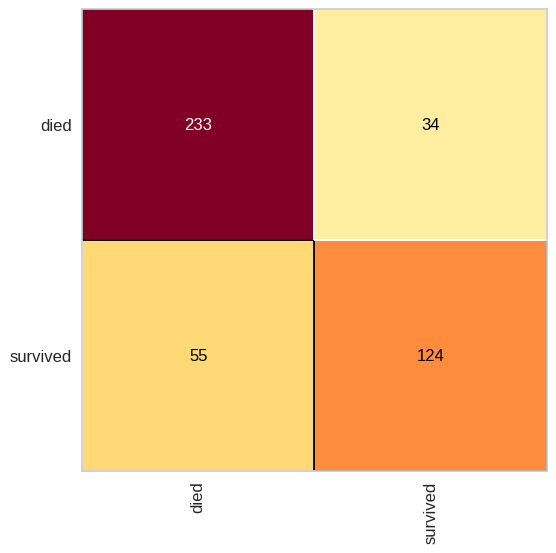

In [158]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
mapping = {0: 'died', 1: 'survived'}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    best_clf,
    classes=['died', 'survived'],
    label_encoder=mapping
)

cm_viz.score(X_test, y_test)

# **LEARNING CURVE**

In [161]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

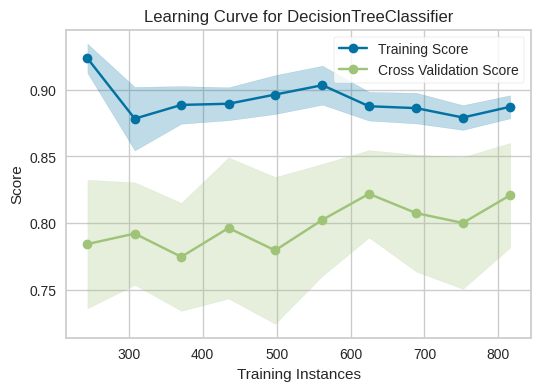

In [163]:
fig, ax = plt.subplots(figsize=(6, 4))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(
    best_clf,
    cv=cv,
    train_sizes=sizes,
    scoring='f1_weighted',
    n_jobs=4,
    ax=ax
)
lc_viz.fit(X, y)
lc_viz.poof()
fig.savefig('/content/sample_data/yo.png')

In [164]:
import pickle

In [165]:
from sklearn.metrics import roc_auc_score

In [166]:
pic = pickle.dumps(best_clf)
rf6 = pickle.loads(pic)
y_pred = rf6.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7826983030987802

# **It was 1 episode (piece of code) of *BestPractices* series**

<img src='https://preview.redd.it/gk81vkz77ovb1.jpg?width=640&crop=smart&auto=webp&s=516be87ebcfb980aa07675f5553e257164651f1f' width=25%><br>
___

**Have a nice day!**